# **Proyecto Módulo 1: Minimización del Costo de Producción de un Nanocatalizador Bimetálico**

### **Integrantes:**

Rodrigo Ruiz Gutiérrez, Fernando Salcedo Rentería & Diego Valencia Cortés.

___
## **Objetivos**
A continuación, se describen los propósitos de este trabajo.

### **Objetivo General**
* Determinar la combinación óptima de precursores que minimice el costo total de producción de un nanocatalizador bimetálico, cumpliendo con las restricciones de pureza y volumen de producción.

### **Objetivos Específicos**
* Establecer un modelo de programación lineal que represente la función de costo y las restricciones del proceso de síntesis.
* Resolver el problema de optimización utilizando la función `linprog` de la librería `SciPy` para encontrar las cantidades exactas de cada precursor.
* Visualizar la región factible y la solución óptima mediante una gráfica para interpretar geométricamente el resultado.

___
## **Modelo que representa el problema**
Para modelar este problema, se utiliza un enfoque de Programación Lineal (PL). Se busca minimizar una función de costo sujeta a un conjunto de restricciones lineales que definen las condiciones de producción.

**1. Variables de Decisión:**
* $x_A$: Masa del Precursor A (en gramos, g).
* $x_B$: Masa del Precursor B (en gramos, g).

**2. Función Objetivo (Minimizar Costo):**
El costo total `C` es la suma del costo de cada precursor, que se desea minimizar.
$$ \text{Minimizar } C(x_A, x_B) = 15x_A + 8x_B $$

**3. Restricciones (Inecuaciones):**
Las condiciones de producción limitan las posibles combinaciones de $x_A$ y $x_B$.

* **Pureza Mínima:** La masa del precursor A debe ser al menos el 60% de la masa total.
    $$ x_A \geq 0.60 (x_A + x_B) \implies 0.40x_A - 0.60x_B \geq 0 $$
* **Volumen de masa Mínimo:** La masa total debe ser de al menos 1800 g.
    $$ x_A + x_B \geq 1800 $$
* **Volumen de masa Máximo:** La masa total no debe exceder los 2200 g.
    $$ x_A + x_B \leq 2200 $$
* **Valores positivos:** Las masas no pueden ser negativas.
    $$ x_A \geq 0, x_B \geq 0 $$

**Parámetros:**
- Costo Precursor A ($P_A$): $15 USD/g.

- Costo Precursor B ($P_B$): $8 USD/g.

- Masa Mínima ($M_{min}$): 1800 g.

- Masa Máxima ($M_{max}$): 2200 g.

- Pureza Mínima ($\alpha$): 60% de $x_A$ en masa total.


In [ ]:
# Importamos las librerías que se usarán:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

___
### Ahora que ya declaramos el modelo, resolvemos con `linprog`:
Para resolver el problema, debemos adaptar las inecuaciones al formato estándar que requiere `scipy.optimize.linprog`, que es $A_{ub} \cdot x \leq b_{ub}$. Las restricciones de "mayor o igual que" deben ser multiplicadas por -1.

* $0.40x_A - 0.60x_B \geq 0 \implies -0.40x_A + 0.60x_B \leq 0$
* $x_A + x_B \geq 1800 \implies -x_A - x_B \leq -1800$
* $x_A + x_B \leq 2200$ (Esta ya está en el formato correcto)

Con esto, podemos construir los vectores y matrices para la solución.

In [ ]:
# Definimos la función de costo, matrices y vectores
# Vector de costos c, que se quiere minimizar
c = np.array([15, 8])

# Matriz de coeficientes de las restricciones de desigualdad (A_ub)
A_ub = np.array([
                 [-0.40, 0.60],  # Restricción de pureza
                 [   -1,   -1],  # Restricción de volumen mínimo
                 [    1,    1]   # Restricción de volumen máximo
                               ])

# Vector de límites de las desigualdades (b_ub)
b_ub = np.array([0, -1800, 2200])

# Límites para las variables (x_A >= 0, x_B >= 0)
x_bounds = (0, None)

# Usamos linprog para encontrar la solución
resultado = opt.linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, x_bounds])

# Mostramos el resultado completo
print("--- Resultados de la Optimización ---")
print(resultado)

# Extraemos y mostramos los valores óptimos
if resultado.success:
    xA_opt, xB_opt = resultado.x
    costo_min = resultado.fun
    print("\n--- Solución Óptima ---")
    print(f"Gramos de Precursor A (xA): {xA_opt:.2f} g")
    print(f"Gramos de Precursor B (xB): {xB_opt:.2f} g")
    print(f"Costo Mínimo Total: ${costo_min:,.2f} USD")

--- Resultados de la Optimización ---
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 21960.0
              x: [ 1.080e+03  7.200e+02]
            nit: 2
          lower:  residual: [ 1.080e+03  7.200e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  4.000e+02]
                 marginals: [-7.000e+00 -1.220e+01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

--- Solución Óptima ---
Gramos de Precursor A (xA): 1080.00 g
Gramos de Precursor B (xB): 720.00 g
Costo Mínimo Total: $21,960.00 USD


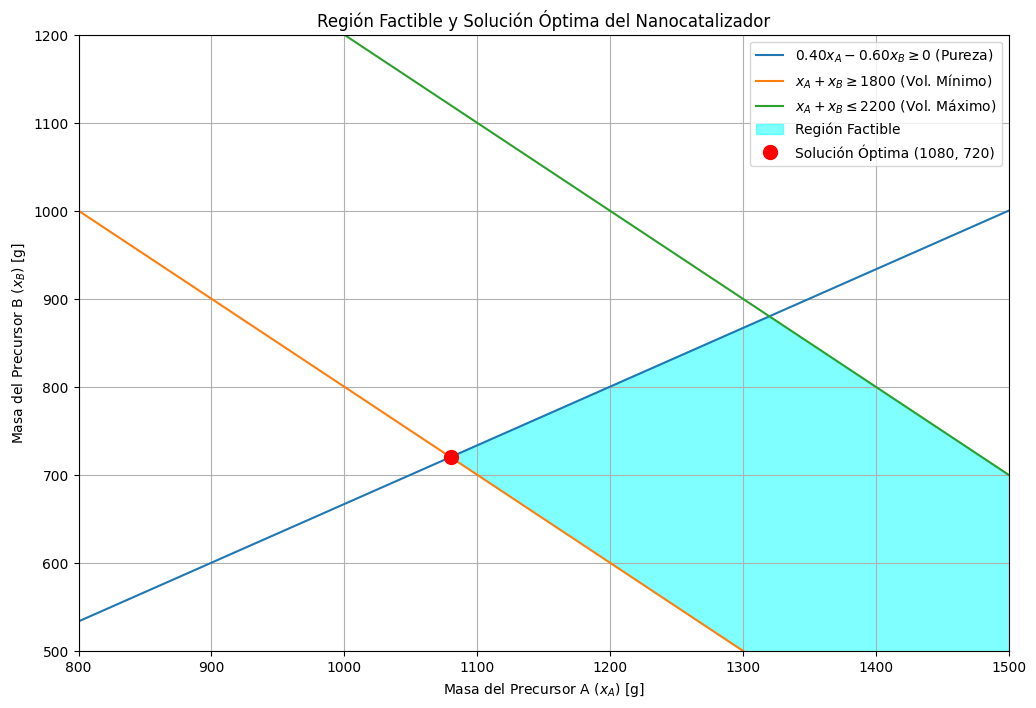

In [ ]:
# Comenzamos con la gráfica para visualizar la región factible
# Creamos un rango de valores para xA
xA = np.linspace(0, 2500, 400)

# Graficamos las líneas de las restricciones
plt.figure(figsize=(12, 8))
plt.plot(xA, (0.40/0.60)*xA, label=r'$0.40x_A - 0.60x_B \geq 0$ (Pureza)')
plt.plot(xA, 1800 - xA, label=r'$x_A + x_B \geq 1800$ (Vol. Mínimo)')
plt.plot(xA, 2200 - xA, label=r'$x_A + x_B \leq 2200$ (Vol. Máximo)')

# Rellenamos la región factible que cumple todas las condiciones
y_pureza = (0.40/0.60)*xA
y_vol_min = 1800 - xA
y_vol_max = 2200 - xA
plt.fill_between(xA, y_vol_min, np.minimum(y_pureza, y_vol_max),
                 where=(y_vol_min <= y_pureza),
                 color='cyan', alpha=0.5, label='Región Factible')

# Ahora creamos la gráfica, marcando el punto óptimo
if resultado.success:
    plt.plot(xA_opt, xB_opt, 'ro', markersize=10, label=f'Solución Óptima ({xA_opt:.0f}, {xB_opt:.0f})')

# Agregamos detalles a la gráfica
plt.xlim(800, 1500)
plt.ylim(500, 1200)
plt.xlabel('Masa del Precursor A ($x_A$) [g]')
plt.ylabel('Masa del Precursor B ($x_B$) [g]')
plt.title('Región Factible y Solución Óptima del Nanocatalizador')
plt.legend()
plt.grid(True)
plt.show()

___
## **Conclusiones**

Con base en los resultados de la optimización, se puede concluir lo siguiente:

* Se **logró el objetivo general** de minimizar el costo de producción. La combinación óptima para producir el nanocatalizador es de **1080 g del Precursor A** y **720 g del Precursor B**, lo que resulta en un costo mínimo de **$21,960.00 USD**.
* El **modelo de programación lineal fue efectivo** para representar las complejas restricciones del problema, permitiendo una solución numérica precisa a través de `SciPy`.
* La **visualización gráfica confirma** que la solución óptima se encuentra en un vértice de la región factible, específicamente en la intersección de las restricciones de *pureza mínima* y *volumen mínimo*. Esto indica que estas son las dos condiciones más limitantes del proceso bajo los costos actuales.

___
## **Referencias**

* Hillier, F. S., & Lieberman, G. J. (2010). *Introducción a la investigación de operaciones* (9.ª ed.). McGraw-Hill.
* SciPy Community. (2023). *scipy.optimize.linprog documentation*. Recuperado de: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html